<a href="https://colab.research.google.com/github/shruthits02/Python_project/blob/main/Python_web_scraping_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests beautifulsoup4 requests-html

In [2]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession

In [3]:
from matplotlib.container import Container
import requests
from bs4 import BeautifulSoup

url = "https://www.imdb.com/list/ls576754431/"

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

movie_containers = soup.find_all('div',attrs = {'class' : 'lister-item-content'})

movie_names = []
movie_years = []
movie_times = []
movie_ratings = []
movie_metascores = []
movie_genres = []

for container in movie_containers:

    movie_name = container.h3.a.text.strip()
    movie_names.append(movie_name)

    movie_year = container.h3.find("span", class_="lister-item-year text-muted unbold").text.strip("()").strip("I").strip(") ()")
    movie_years.append(movie_year)

    runtime_element = container.find("span", class_="runtime")
    movie_time = runtime_element.text.strip() if runtime_element else "N/A"
    movie_times.append(movie_time)

    rating_element = container.find("span", class_="ipl-rating-star__rating")
    movie_rating = rating_element.text.strip() if rating_element else "N/A"
    movie_ratings.append("N/A" if movie_rating == "0" else movie_rating)

    meta = container.find("span", class_="metascore").text.strip() if container.find("span", class_="metascore") else 'N/A'
    movie_metascores.append(meta)

    movie_genre = container.find("span", class_="genre").text.strip()
    movie_genres.append(movie_genre)

In [4]:
movie_df = pd.DataFrame({
    'Movie Name': movie_names,
    'Year of Release': movie_years,
    'Duration': movie_times,
    'Movie Rating': movie_ratings,
    'Metascore': movie_metascores,
    'Genre': movie_genres
})

In [5]:
movie_df

,Movie Name,Year of Release,Duration,Movie Rating,Metascore,Genre
0,Oppenheimer,2023,180 min,8.5,88,"Biography, Drama, History"
1,Spider-Man: Across the Spider-Verse,2023,140 min,8.7,86,"Animation, Action, Adventure"
2,Mission: Impossible - Dead Reckoning Part One,2023,163 min,7.8,81,"Action, Adventure, Thriller"
3,John Wick: Chapter 4,2023,169 min,7.7,78,"Action, Crime, Thriller"
4,Killers of the Flower Moon,2023,206 min,8.1,89,"Crime, Drama, History"
5,Dune: Part Two,2024,150 min,N/A,N/A,"Action, Adventure, Drama"
6,Past Lives,2023,105 min,8,94,"Drama, Romance"
7,Anatomy of a Fall,2023,151 min,7.9,87,"Crime, Drama, Thriller"
8,A Haunting in Venice,2023,103 min,6.7,63,"Crime, Drama, Horror"
9,Indiana Jones and the Dial of Destiny,2023,154 min,6.6,58,"Action, Adventure, Sci-Fi"


In [6]:
movie_df.to_csv('movie_df.csv', index=False)

In [25]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob


url = "https://www.imdb.com/title/tt10366206/reviews"
reviews_count = 5

threshold_polarity = 0.0

response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    reviews = soup.find_all('div', class_='text show-more__control')

    if reviews:
        for i, review in enumerate(reviews[:reviews_count]):
            review_text = review.get_text()

            sentiment = TextBlob(review_text)
            sentiment_polarity = sentiment.sentiment.polarity
            sentiment_subjectivity = sentiment.sentiment.subjectivity

            sentiment_category = "Positive" if sentiment_polarity > threshold_polarity else "Negative"

            print(f"Review {i + 1} - Sentiment Analysis:")
            print("Review Text:")
            print(review_text)
            print("Sentiment Analysis:")
            print(f"Polarity: {sentiment_polarity}")
            print(f"Subjectivity: {sentiment_subjectivity}")
            print(f"Review Category: {sentiment_category}")
            print("\n")
    else:
        print("No reviews found on the page.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

Review 1 - Sentiment Analysis:
Review Text:
Imagine a video game where you are shooting bad guys. Your hardware is old so everything is kind of slow and out of focus. The opponents are set to Easy and you installed a hack to give you invincibility and autoaim. And they come at you slowly, shouting, out in the open, with weapons that fire three or four bullets before they run out and they can shoot anything anyway. They use no snipers, no explosives, no traps of any kind. They can't even hit you when they're next to you and wielding a knife. And you try to fight them in a decent manner, yet your avatar moves like a 60 year old man and even with the autoaim you still suck. And if you somehow get into the many separate levels where nothing make sense, you get a big cinematic that takes you out of it. And because the cinematic is in 4k or whatever, it feels like slow motion.That, my friends, is the experience of watching JW4. The style that people have applauded in the first movie has turn

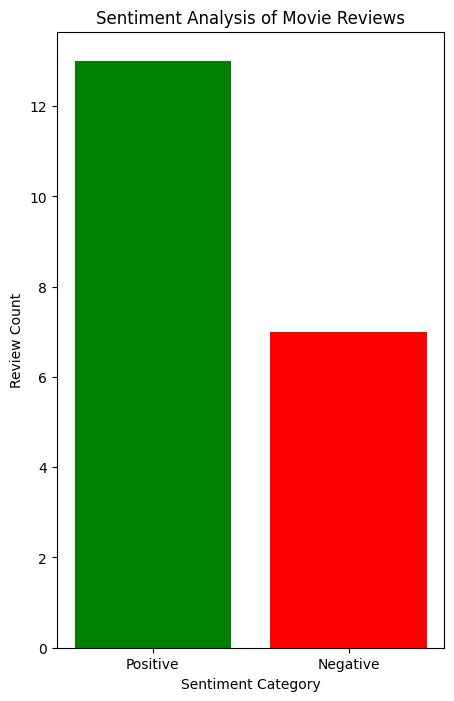

In [8]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt

# Define the IMDb URL for a movie's reviews
url = "https://www.imdb.com/title/tt10366206/reviews"
reviews_count = 20
threshold_polarity = 0.0

response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    reviews = soup.find_all('div', class_='text show-more__control')

    if reviews:

        positive_count = 0
        negative_count = 0

        for i, review in enumerate(reviews[:reviews_count]):
            review_text = review.get_text()


            sentiment = TextBlob(review_text)
            sentiment_polarity = sentiment.sentiment.polarity

            if sentiment_polarity > threshold_polarity:
                positive_count += 1
            else:
                negative_count += 1

        labels = ['Positive', 'Negative']
        counts = [positive_count, negative_count]

        colors = ['green', 'red']

        plt.figure(figsize=(5, 8))
        plt.bar(labels, counts, color=colors)
        plt.xlabel('Sentiment Category')
        plt.ylabel('Review Count')
        plt.title('Sentiment Analysis of Movie Reviews')

        plt.show()
    else:
        print("No reviews found on the page.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

In [9]:
import requests
from bs4 import BeautifulSoup
import os

url = "https://www.imdb.com/list/ls576754431/"

response = requests.get(url)

if response.status_code == 200:

    soup = BeautifulSoup(response.text, "html.parser")

    img_elements = soup.find_all("img", class_="loadlate")

    save_directory = "imdb_images"
    os.makedirs(save_directory, exist_ok=True)

    for img in img_elements:
        img_url = img["loadlate"]
        img_name = img["alt"]
        img_data = requests.get(img_url).content

        with open(os.path.join(save_directory, f"{img_name}.jpg"), "wb") as img_file:
            img_file.write(img_data)

    print(f"{len(img_elements)} images have been saved to {save_directory}.")

else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)

34 images have been saved to imdb_images.


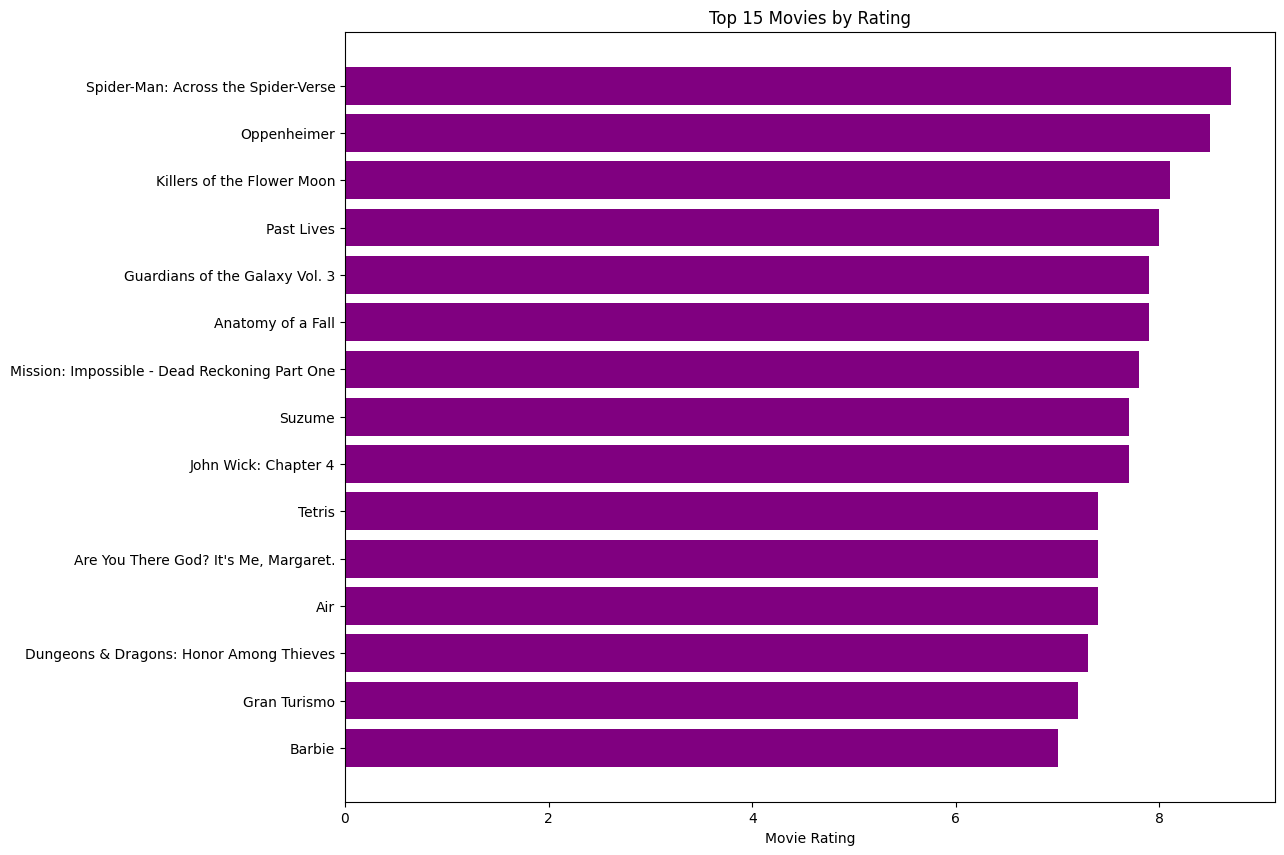

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Movie Name': [
        'No One Will Save You', 'Indiana Jones and the Dial of Destiny', 'Asteroid City',
        'A Haunting in Venice', 'Beau Is Afraid', 'Bottoms', 'Barbie', 'Gran Turismo',
        'Dungeons & Dragons: Honor Among Thieves', 'Air', "Are You There God? It's Me, Margaret.",
        'Tetris', 'John Wick: Chapter 4', 'Suzume', 'Mission: Impossible - Dead Reckoning Part One',
        'Anatomy of a Fall', 'Guardians of the Galaxy Vol. 3', 'Past Lives', 'Killers of the Flower Moon',
        'Oppenheimer', 'Spider-Man: Across the Spider-Verse'
    ],
    'Movie Rating': [
        6.3, 6.6, 6.6, 6.7, 6.8, 6.9, 7, 7.2, 7.3, 7.4, 7.4, 7.4, 7.7, 7.7, 7.8, 7.9, 7.9, 8, 8.1, 8.5, 8.7
    ]
}

df = pd.DataFrame(data)

df = df.sort_values(by='Movie Rating', ascending=False).head(15)

# Create a bar chart for the top 15 movies
plt.figure(figsize=(12, 10))
plt.barh(df['Movie Name'], df['Movie Rating'], color='purple')
plt.xlabel('Movie Rating')
plt.title('Top 15 Movies by Rating')
plt.gca().invert_yaxis()
plt.show()


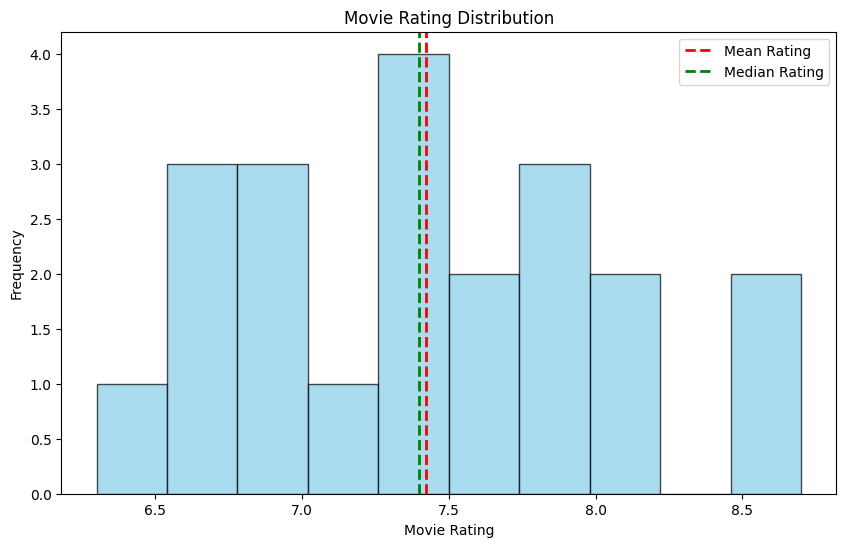

Average (Mean) Movie Rating: 7.423809523809524
Median Movie Rating: 7.4
Standard Deviation of Movie Ratings: 0.6472285237107229


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Movie Rating': [
        6.3, 6.6, 6.6, 6.7, 6.8, 6.9, 7, 7.2, 7.3, 7.4, 7.4, 7.4, 7.7, 7.7, 7.8, 7.9, 7.9, 8, 8.1, 8.5, 8.7
    ]
}

df = pd.DataFrame(data)

mean_rating = df['Movie Rating'].mean()
median_rating = df['Movie Rating'].median()
std_dev_rating = df['Movie Rating'].std()


plt.figure(figsize=(10, 6))
plt.hist(df['Movie Rating'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Movie Rating')
plt.ylabel('Frequency')
plt.title('Movie Rating Distribution')
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth=2, label='Mean Rating')
plt.axvline(median_rating, color='green', linestyle='dashed', linewidth=2, label='Median Rating')
plt.legend()
plt.show()

print("Average (Mean) Movie Rating:", mean_rating)
print("Median Movie Rating:", median_rating)
print("Standard Deviation of Movie Ratings:", std_dev_rating)


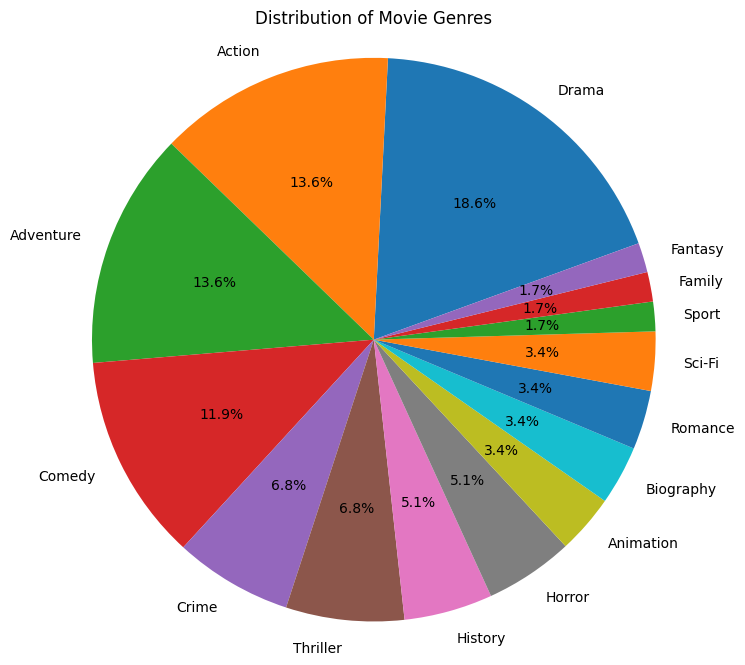

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Movie Name': [
        'Spider-Man: Across the Spider-Verse', 'Oppenheimer', 'Killers of the Flower Moon',
        'Past Lives', 'Anatomy of a Fall', 'Guardians of the Galaxy Vol. 3',
        'Mission: Impossible - Dead Reckoning Part One', 'John Wick: Chapter 4',
        'Suzume', 'Air', "Are You There God? It's Me, Margaret.", 'Tetris',
        'Dungeons & Dragons: Honor Among Thieves', 'Gran Turismo', 'Barbie', 'Bottoms',
        'Beau Is Afraid', 'A Haunting in Venice', 'Indiana Jones and the Dial of Destiny',
        'Asteroid City', 'No One Will Save You'
    ],
    'Genre': [
        'Animation, Action, Adventure', 'Biography, Drama, History', 'Crime, Drama, History',
        'Drama, Romance', 'Crime, Drama, Thriller', 'Action, Adventure, Comedy',
        'Action, Adventure, Thriller', 'Action, Crime, Thriller', 'Animation, Action, Adventure',
        'Drama, Sport', 'Comedy, Drama, Family', 'Biography, Drama, History',
        'Action, Adventure, Comedy', 'Action, Adventure, Drama', 'Adventure, Comedy, Fantasy',
        'Comedy', 'Comedy, Drama, Horror', 'Crime, Drama, Horror', 'Action, Adventure, Sci-Fi',
        'Comedy, Drama, Romance', 'Horror, Sci-Fi, Thriller'
    ]
}

df = pd.DataFrame(data)


genre_counts = df['Genre'].str.split(', ').explode().value_counts()


plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Movie Genres')
plt.show()
